In [102]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib. pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load and pre-process the dataset

In [2]:
crm_ds_url = "https://raw.githubusercontent.com/pam1202g/SIT720_A4/main/Customer%20relationship%20marketing%20(CRM).csv"

In [3]:
data = pd.read_csv(crm_ds_url)
data.shape

(9134, 20)

In [4]:
data.head()

State  Customer Lifetime Value Response  Coverage Education  \
0  Washington              2763.519279       No     Basic  Bachelor   
1     Arizona              6979.535903       No  Extended  Bachelor   
2      Nevada             12887.431650       No   Premium  Bachelor   
3  California              7645.861827       No     Basic  Bachelor   
4  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4         2/03/2011         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Number of Open Complaints  Number of Policies        Policy  \
0                          0                   1  Corporate L3   
1                          0                   8   Personal L3   
2                          0                   2   Personal L3   
3                          0                   7  Corporate L2   
4                          0                   1   Personal L1   

  Renew Offer Type Sales Channel  Total Claim Amount  Vehicle Class  
0           Offer1         Agent          384.811147   Two-Door Car  
1           Offer3         Agent         1131.464935  Four-Door Car  
2           Offer1         Agent          566.472247   Two-Door Car  
3           Offer1   Call Center          529.881344            SUV  
4           Offer1         Agent          138.130879  Four-Door Car

In [5]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Number of Open Complaints',
       'Number of Policies', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Total Claim Amount', 'Vehicle Class'],
      dtype='object')

In [6]:
data.dtypes

State                         object
Customer Lifetime Value      float64
Response                      object
Coverage                      object
Education                     object
Effective To Date             object
EmploymentStatus              object
Gender                        object
Income                         int64
Location Code                 object
Marital Status                object
Monthly Premium Auto           int64
Months Since Last Claim        int64
Number of Open Complaints      int64
Number of Policies             int64
Policy                        object
Renew Offer Type              object
Sales Channel                 object
Total Claim Amount           float64
Vehicle Class                 object
dtype: object

#### We can identify the following variable types in the dataset. There are categorical, numerical and date type variables in the dataset

| Column | Variable Type |               | Column | Variable Type |               | Column | Variable Type |
| --- | --- |                            | --- | --- |                            | --- | --- |
| Response | Category |                  | Income | int64 |                       | Effective To Date | DateTime |
| Coverage | Category |                  | Monthly Premium Auto | int64 |
| Education | Category |                 | Number of Open Complaints | int64 |
| Coverage | Category |                  | Number of Policies | int64 |
| Education | Category |                 | Customer Lifetime Value | float64 |
| EmploymentStatus | Category |
| Marital Status | Category |
| Location Code | Category |
| Policy | Category |
| Renew Offer Type | Category |
| Sales Channel | Category |
| Vehicle Class | Category |

#### We can identify the following discrete and continuous variables in the dataset

#### Discrete

- Response
- Coverage
- Education
- Coverage
- EmploymentStatus
- Marital Status
- Location Code
- Policy
- Renew Offer Type
- Vehicle Class
- Number of Open Complaints
- Number of Policies

#### Continuous

- Income
- Monthly Premium Auto
- Customer Lifetime Value

### Showing all the unique categories in the dataset

In [7]:
def print_unique(df):
    for var in df.columns:
        print(f"Categories present in {var} :: {data[var].unique()[0:20]} \n------------------------")

In [8]:
print_unique(data[["State", "Response", "Education", "Coverage", "EmploymentStatus", "Marital Status",
                  "Location Code", "Policy", "Renew Offer Type", "Sales Channel", "Vehicle Class"]])

Categories present in State :: ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 
------------------------
Categories present in Response :: ['No' 'Yes'] 
------------------------
Categories present in Education :: ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 
------------------------
Categories present in Coverage :: ['Basic' 'Extended' 'Premium'] 
------------------------
Categories present in EmploymentStatus :: ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired'] 
------------------------
Categories present in Marital Status :: ['Married' 'Single' 'Divorced'] 
------------------------
Categories present in Location Code :: ['Suburban' 'Rural' 'Urban'] 
------------------------
Categories present in Policy :: ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3'] 
------------------------
Categories present in Renew Offer Type :: ['Offer1' 'Offer3' 'Offer2' 'Offer4'] 
-------

## Visualising the distribution of all the numeric features in the dataset

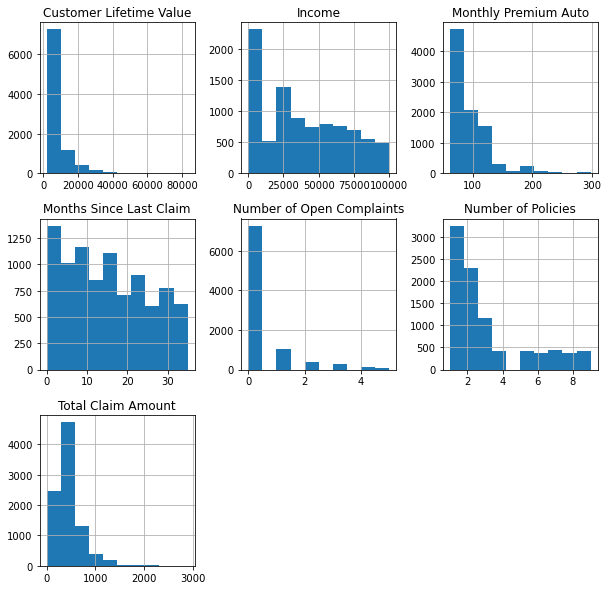

In [9]:
data.hist(figsize=(10,10))
plt.show()

#### There continuous and discrete variables in the dataset.

### Univariate Analysis: Numerical Variables

In [10]:
data.select_dtypes(include=['int64', 'float64']).dtypes

Customer Lifetime Value      float64
Income                         int64
Monthly Premium Auto           int64
Months Since Last Claim        int64
Number of Open Complaints      int64
Number of Policies             int64
Total Claim Amount           float64
dtype: object

In [11]:
customer_payment = ['Income','Monthly Premium Auto']
customer_policy_claim = ['Customer Lifetime Value', 'Total Claim Amount']

In [12]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

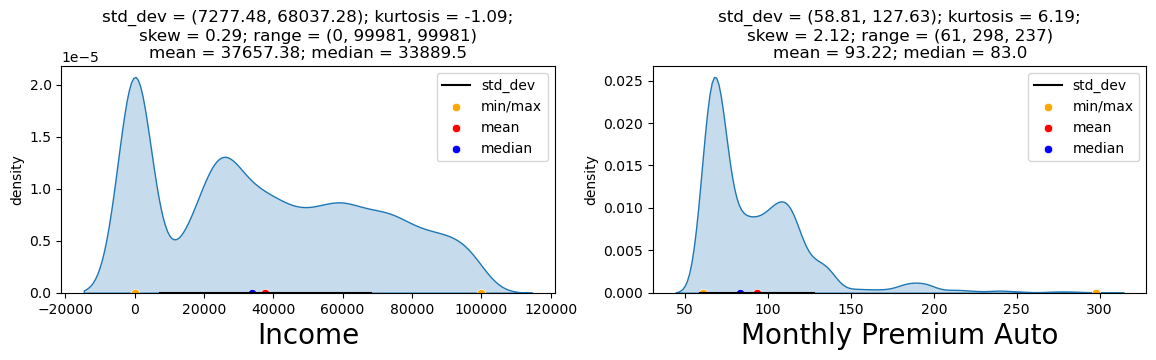

In [13]:
UVA_numeric(data, customer_payment)

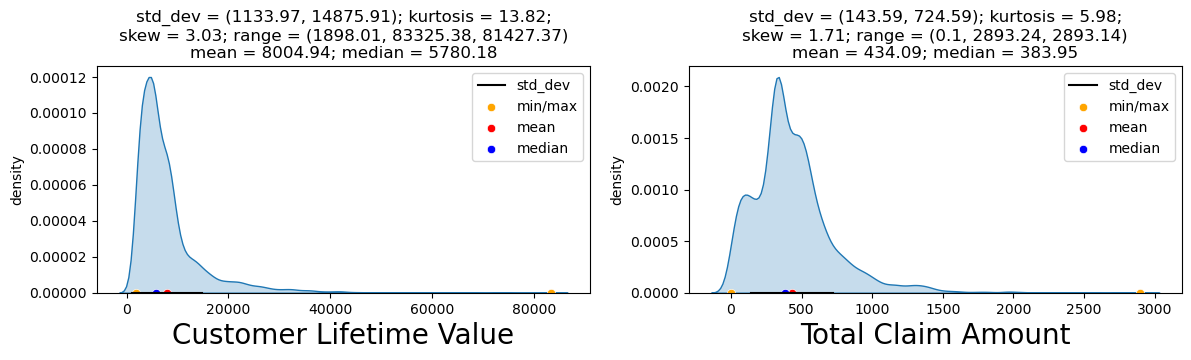

In [14]:
UVA_numeric(data, customer_policy_claim)

In [15]:
def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

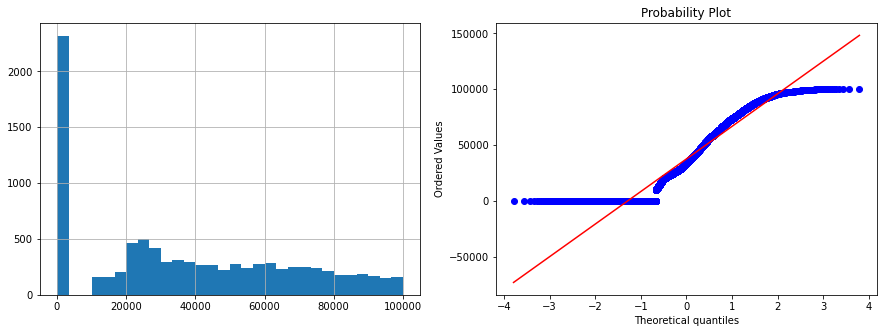

In [16]:
diagnostic_plots(data, 'Income')

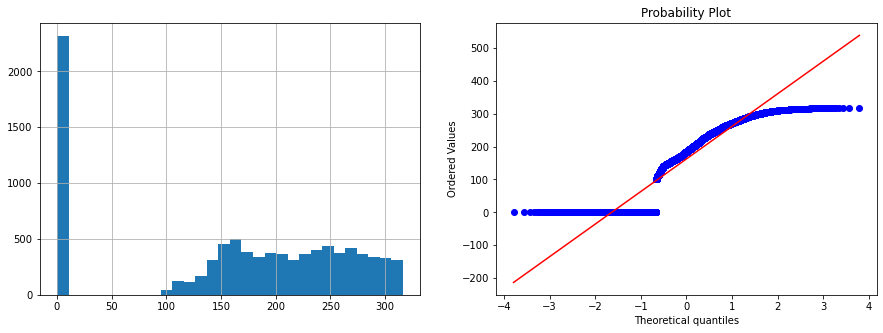

In [17]:
data['Income_sqr'] = data['Income']**(1/2) 
diagnostic_plots(data, 'Income_sqr')

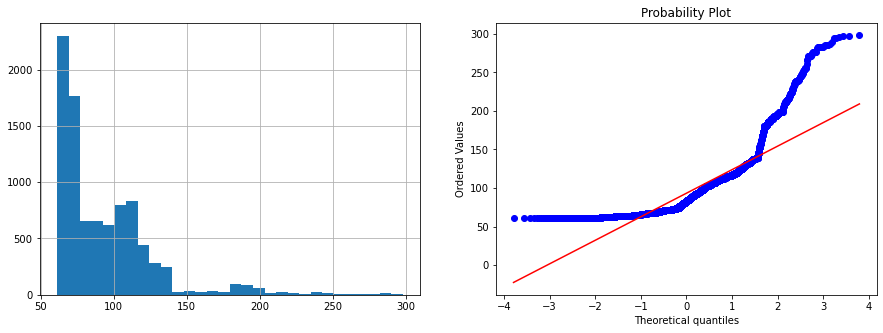

In [18]:
diagnostic_plots(data, 'Monthly Premium Auto')

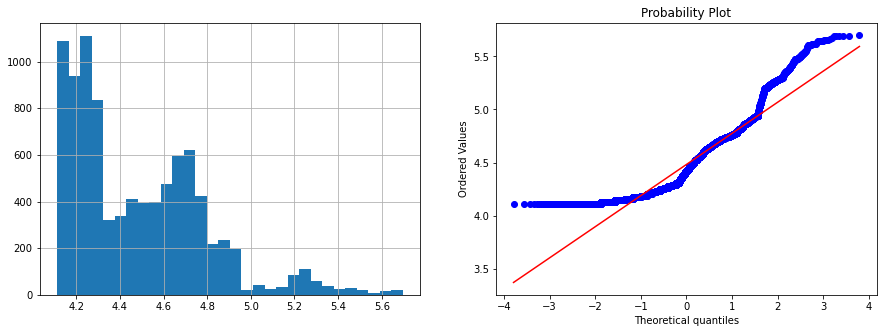

In [19]:
data['Monthly_Premium_Auto_log'] = np.log(data['Monthly Premium Auto'])
diagnostic_plots(data, 'Monthly_Premium_Auto_log')

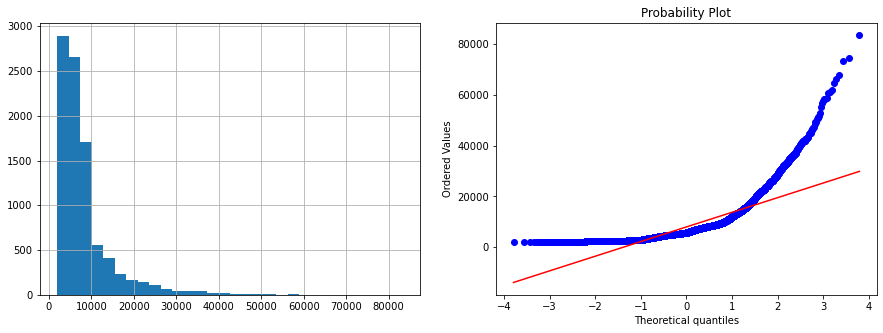

In [20]:
diagnostic_plots(data, 'Customer Lifetime Value')

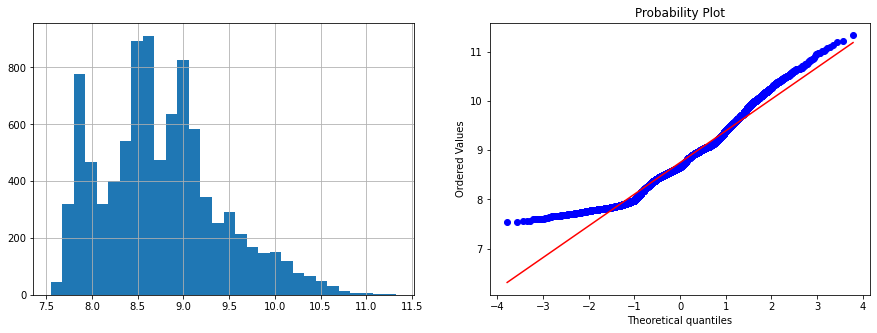

In [21]:
data['Customer_Lifetime_Value_log'] = np.log(data['Customer Lifetime Value'])
diagnostic_plots(data, 'Customer_Lifetime_Value_log')

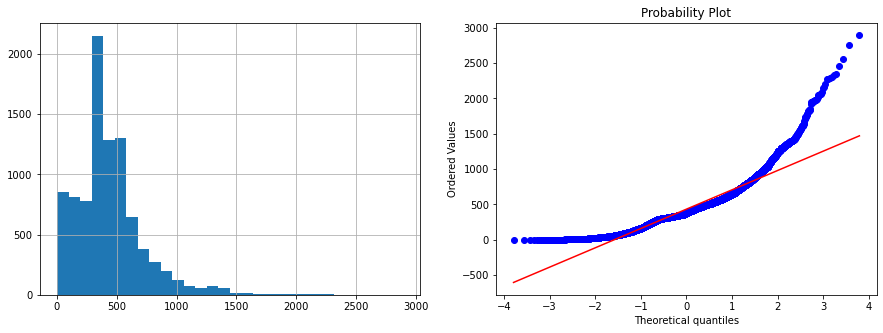

In [22]:
diagnostic_plots(data, 'Total Claim Amount')

### Univariate Analysis : Categorical Variables

In [23]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniquesGrLivArea_log = {} \n value counts \n {};'.format(n_uni,norm_count))

In [24]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
dtype: object

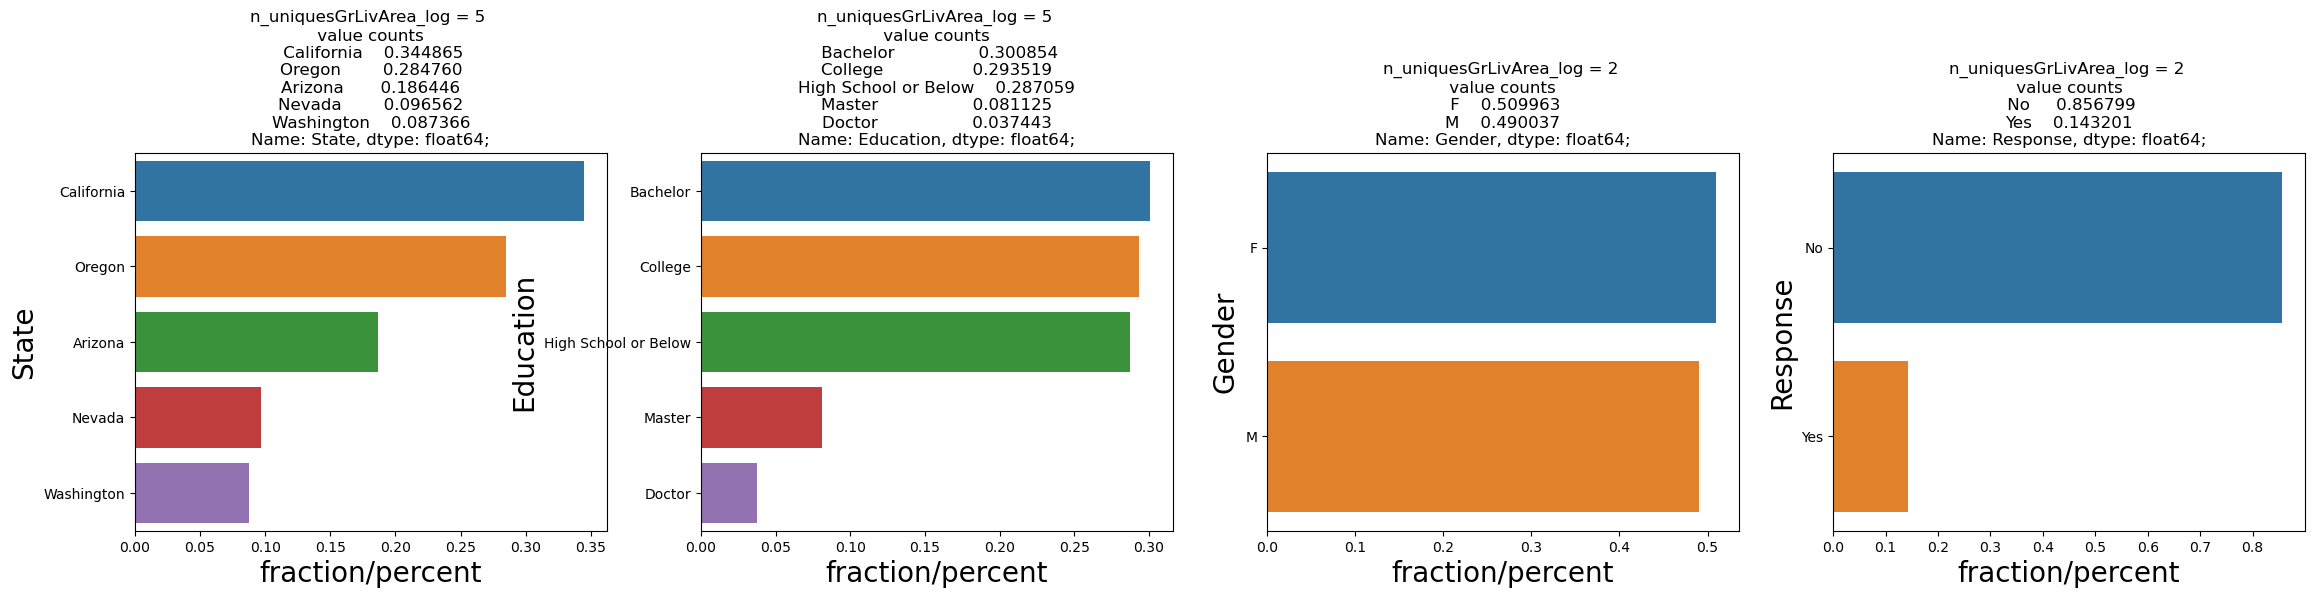

In [28]:
UVA_category(data, ['State', 'Education', 'Gender', 'Response'])

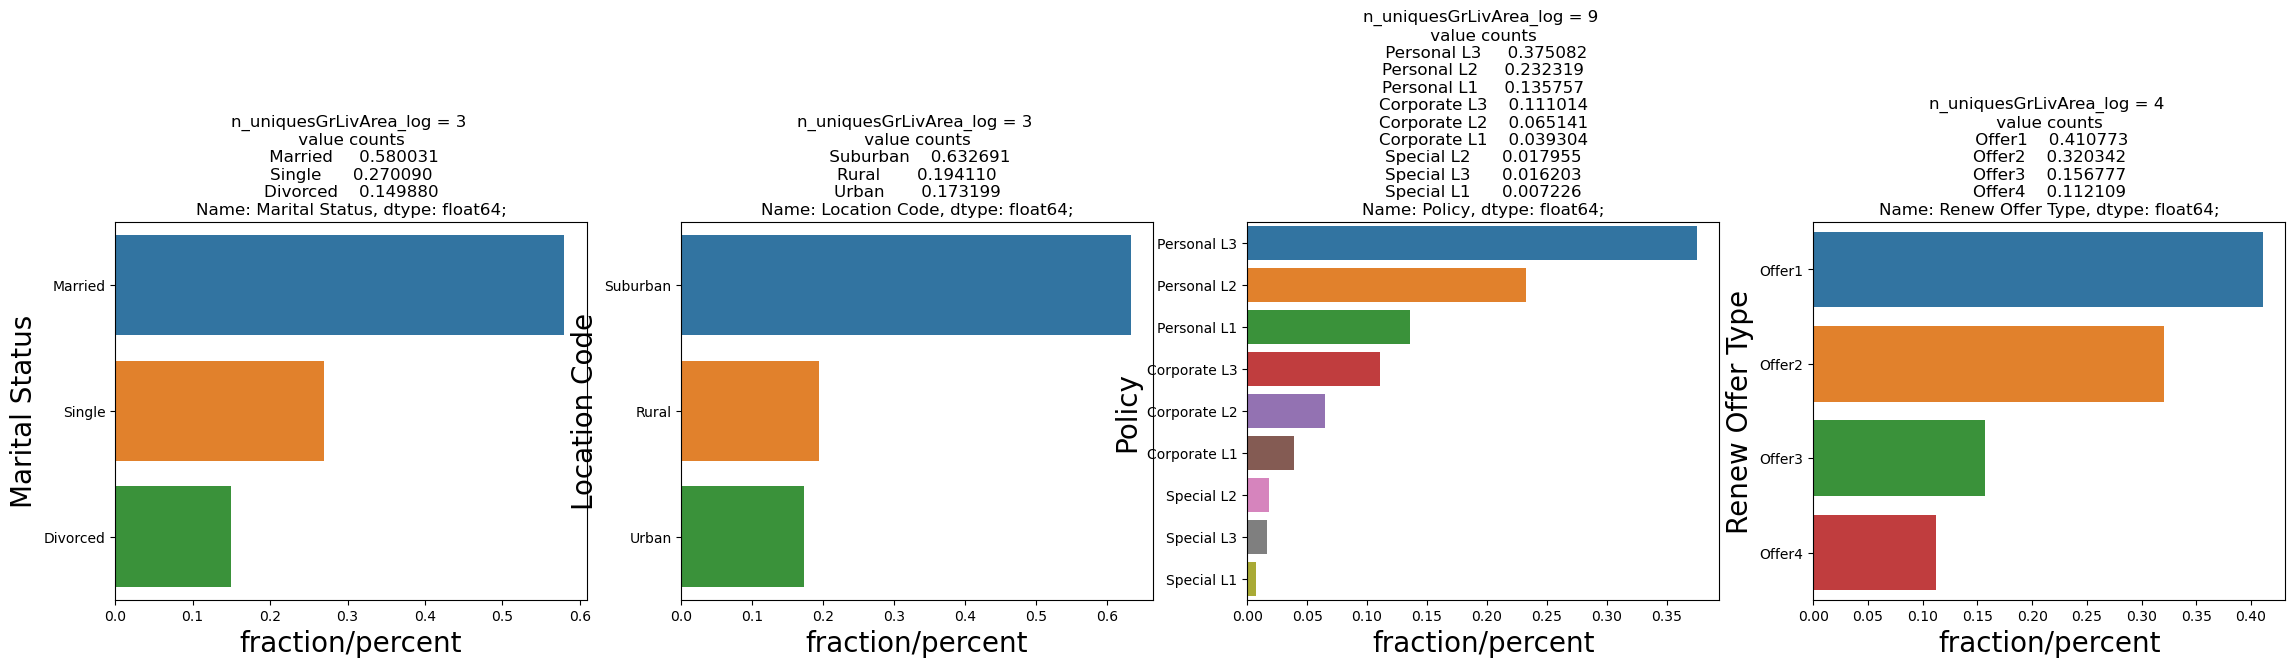

In [29]:
UVA_category(data, ['Marital Status', 'Location Code', 'Policy', 'Renew Offer Type'])

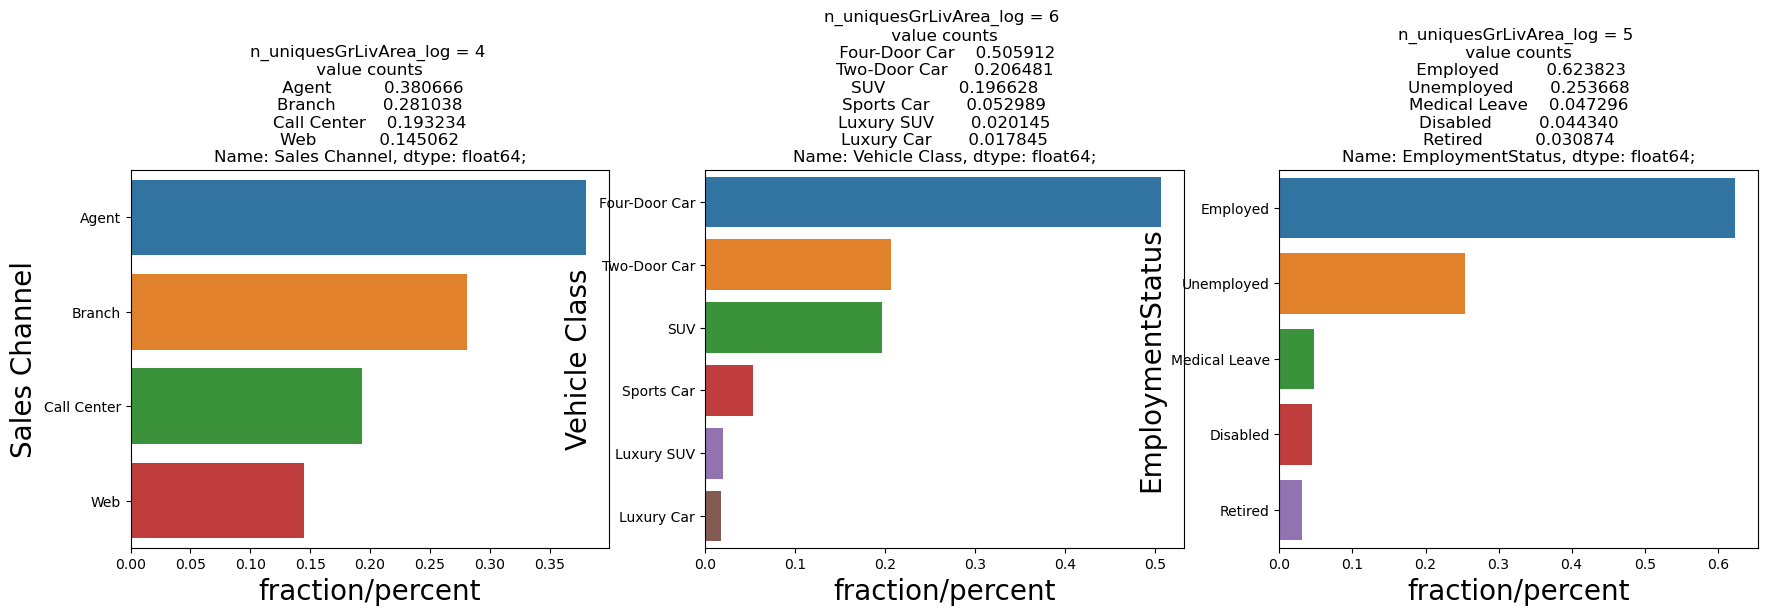

In [30]:
UVA_category(data, ['Sales Channel', 'Vehicle Class', 'EmploymentStatus'])

### Bivariate Analysis

<AxesSubplot:xlabel='Coverage', ylabel='count'>

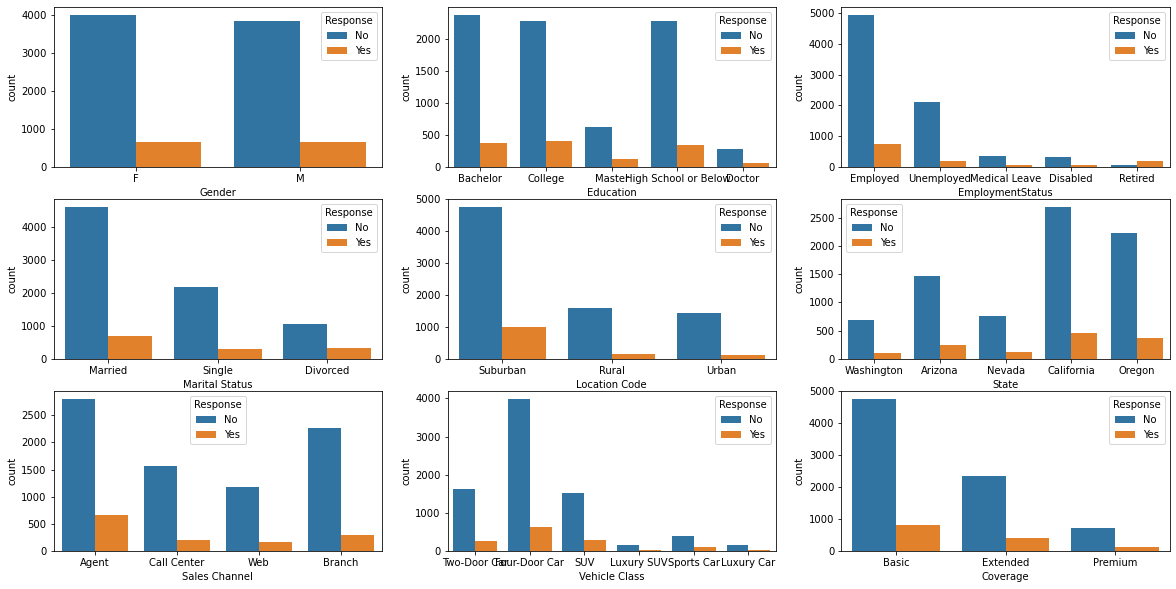

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20,10))
sns.countplot(x='Gender', hue='Response', data=data, ax=axs[0,0])
sns.countplot(x='Education', hue='Response', data=data, ax=axs[0,1])
sns.countplot(x='EmploymentStatus', hue='Response', data=data, ax=axs[0,2])
sns.countplot(x='Marital Status', hue='Response', data=data, ax=axs[1,0])
sns.countplot(x='Location Code', hue='Response', data=data, ax=axs[1,1])
sns.countplot(x='State', hue='Response', data=data, ax=axs[1,2])
sns.countplot(x='Sales Channel', hue='Response', data=data, ax=axs[2,0])
sns.countplot(x='Vehicle Class', hue='Response', data=data, ax=axs[2,1])
sns.countplot(x='Coverage', hue='Response', data=data, ax=axs[2,2])

In [32]:
table = pd.crosstab(data['Gender'],data['Response'],)
print(table)

Response    No  Yes
Gender             
F         3998  660
M         3828  648


## Feature Engineering

#### Datatypes found in data

In [33]:
data.dtypes

State                           object
Customer Lifetime Value        float64
Response                        object
Coverage                        object
Education                       object
Effective To Date               object
EmploymentStatus                object
Gender                          object
Income                           int64
Location Code                   object
Marital Status                  object
Monthly Premium Auto             int64
Months Since Last Claim          int64
Number of Open Complaints        int64
Number of Policies               int64
Policy                          object
Renew Offer Type                object
Sales Channel                   object
Total Claim Amount             float64
Vehicle Class                   object
Income_sqr                     float64
Monthly_Premium_Auto_log       float64
Customer_Lifetime_Value_log    float64
dtype: object

In [34]:
replace_values_spread = {"Response": {"No": 0, "Yes": 1}}

data = data.replace(replace_values_spread)

In [35]:
data['Response'] = data['Response'].astype(int)

### Ordered Integer Encoding for categorical variables

In [36]:
ordered_lbl_sta = data.groupby(['State'])['Response'].mean().sort_values().index
ordered_lbl_cov = data.groupby(['Coverage'])['Response'].mean().sort_values().index
ordered_lbl_edu = data.groupby(['Education'])['Response'].mean().sort_values().index
ordered_lbl_emp = data.groupby(['EmploymentStatus'])['Response'].mean().sort_values().index
ordered_lbl_loc = data.groupby(['Location Code'])['Response'].mean().sort_values().index
ordered_lbl_mrt = data.groupby(['Marital Status'])['Response'].mean().sort_values().index
ordered_lbl_pol = data.groupby(['Policy'])['Response'].mean().sort_values().index
ordered_lbl_ofr = data.groupby(['Renew Offer Type'])['Response'].mean().sort_values().index
ordered_lbl_sls = data.groupby(['Sales Channel'])['Response'].mean().sort_values().index
ordered_lbl_vhc = data.groupby(['Vehicle Class'])['Response'].mean().sort_values().index

In [37]:
ord_map_sta = {k: i for i, k in enumerate(ordered_lbl_sta, 0)}
ord_map_cov = {k: i for i, k in enumerate(ordered_lbl_cov, 0)}
ord_map_edu = {k: i for i, k in enumerate(ordered_lbl_edu, 0)}
ord_map_emp = {k: i for i, k in enumerate(ordered_lbl_emp, 0)}
ord_map_loc = {k: i for i, k in enumerate(ordered_lbl_loc, 0)}
ord_map_mrt = {k: i for i, k in enumerate(ordered_lbl_mrt, 0)}
ord_map_pol = {k: i for i, k in enumerate(ordered_lbl_pol, 0)}
ord_map_ofr = {k: i for i, k in enumerate(ordered_lbl_ofr, 0)}
ord_map_sls = {k: i for i, k in enumerate(ordered_lbl_sls, 0)}
ord_map_vhc = {k: i for i, k in enumerate(ordered_lbl_vhc, 0)}


print(f"State Encoding\n{ord_map_sta}")
print("-------------------------------------------------")
print(f"Coverage Encoding\n {ord_map_cov}")
print("-------------------------------------------------")
print(f"Education Encoding\n {ord_map_edu}")
print("-------------------------------------------------")
print(f"EmploymentStatus Encoding\n {ord_map_emp}")
print("-------------------------------------------------")
print(f"Location Code Encoding\n {ord_map_loc}")
print("-------------------------------------------------")
print(f"Marital Status Encoding\n {ord_map_mrt}")
print("-------------------------------------------------")
print(f"Policy Encoding\n {ord_map_pol}")
print("-------------------------------------------------")
print(f"Renew Offer Type Encoding\n {ord_map_ofr}")
print("-------------------------------------------------")
print(f"Sales Channel Encoding\n {ord_map_sls}")
print("-------------------------------------------------")
print(f"Vehicle Class Encoding {ord_map_vhc}")

State Encoding
{'Washington': 0, 'Nevada': 1, 'Arizona': 2, 'Oregon': 3, 'California': 4}
-------------------------------------------------
Coverage Encoding
 {'Extended': 0, 'Basic': 1, 'Premium': 2}
-------------------------------------------------
Education Encoding
 {'High School or Below': 0, 'Bachelor': 1, 'College': 2, 'Master': 3, 'Doctor': 4}
-------------------------------------------------
EmploymentStatus Encoding
 {'Unemployed': 0, 'Employed': 1, 'Disabled': 2, 'Medical Leave': 3, 'Retired': 4}
-------------------------------------------------
Location Code Encoding
 {'Urban': 0, 'Rural': 1, 'Suburban': 2}
-------------------------------------------------
Marital Status Encoding
 {'Single': 0, 'Married': 1, 'Divorced': 2}
-------------------------------------------------
Policy Encoding
 {'Special L2': 0, 'Corporate L1': 1, 'Personal L3': 2, 'Personal L2': 3, 'Corporate L2': 4, 'Personal L1': 5, 'Corporate L3': 6, 'Special L1': 7, 'Special L3': 8}
-------------------------

In [38]:
ord_map_sta = {k: i for i, k in enumerate(ordered_lbl_sta, 0)}
ord_map_cov = {k: i for i, k in enumerate(ordered_lbl_cov, 0)}
ord_map_edu = {k: i for i, k in enumerate(ordered_lbl_edu, 0)}
ord_map_emp = {k: i for i, k in enumerate(ordered_lbl_emp, 0)}
ord_map_loc = {k: i for i, k in enumerate(ordered_lbl_loc, 0)}
ord_map_mrt = {k: i for i, k in enumerate(ordered_lbl_mrt, 0)}
ord_map_pol = {k: i for i, k in enumerate(ordered_lbl_pol, 0)}
ord_map_ofr = {k: i for i, k in enumerate(ordered_lbl_ofr, 0)}
ord_map_sls = {k: i for i, k in enumerate(ordered_lbl_sls, 0)}
ord_map_vhc = {k: i for i, k in enumerate(ordered_lbl_vhc, 0)}

replace_values_spread = {"State": ord_map_sta,
                "Coverage": ord_map_cov,
                "Education": ord_map_edu,
                "EmploymentStatus": ord_map_emp,  
                "Location Code": ord_map_loc,
                "Marital Status": ord_map_mrt,
                "Policy": ord_map_pol,  
                "Renew Offer Type": ord_map_ofr,
                "Sales Channel": ord_map_sls,
                "Vehicle Class": ord_map_vhc}

df = data.replace(replace_values_spread)

In [39]:
df.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0      0              2763.519279         0         1          1   
1      2              6979.535903         0         0          1   
2      1             12887.431650         0         2          1   
3      4              7645.861827         0         1          1   
4      0              2813.692575         0         1          1   

  Effective To Date  EmploymentStatus Gender  Income  Location Code  ...  \
0           2/24/11                 1      F   56274              2  ...   
1           1/31/11                 0      F       0              2  ...   
2           2/19/11                 1      F   48767              2  ...   
3           1/20/11                 0      M       0              2  ...   
4         2/03/2011                 1      M   43836              1  ...   

   Number of Open Complaints  Number of Policies  Policy  Renew Offer Type  \
0                          0                   1       6                 2   
1                          0                   8       2                 1   
2                          0                   2       2                 2   
3                          0                   7       4                 2   
4                          0                   1       5                 2   

   Sales Channel  Total Claim Amount  Vehicle Class  Income_sqr  \
0              3          384.811147              2  237.221416   
1              3         1131.464935              1    0.000000   
2              3          566.472247              2  220.832516   
3              0          529.881344              3    0.000000   
4              3          138.130879              1  209.370485   

   Monthly_Premium_Auto_log  Customer_Lifetime_Value_log  
0                  4.234107                     7.924260  
1                  4.543295                     8.850738  
2                  4.682131                     9.464008  
3                  4.663439                     8.941920  
4                  4.290459                     7.942253  

[5 rows x 23 columns]

### Splitting the date parts from the <I>Effective To Date</I> column, to get more granular information

In [40]:
date = pd.DatetimeIndex(df['Effective To Date'])
df['day_of_month'] = date.day
df['month_of_year'] = date.month
df['year'] = date.year

df = df.drop(columns = ['Effective To Date'])

In [41]:
df['year'].min(), df['year'].max()

(2011, 2011)

In [42]:
# dropping year since all values are same
df = df.drop(columns = ['year'])

In [43]:
df.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0      0              2763.519279         0         1          1   
1      2              6979.535903         0         0          1   
2      1             12887.431650         0         2          1   
3      4              7645.861827         0         1          1   
4      0              2813.692575         0         1          1   

   EmploymentStatus Gender  Income  Location Code  Marital Status  ...  \
0                 1      F   56274              2               1  ...   
1                 0      F       0              2               0  ...   
2                 1      F   48767              2               1  ...   
3                 0      M       0              2               1  ...   
4                 1      M   43836              1               0  ...   

   Policy  Renew Offer Type  Sales Channel  Total Claim Amount  Vehicle Class  \
0       6                 2              3          384.811147              2   
1       2                 1              3         1131.464935              1   
2       2                 2              3          566.472247              2   
3       4                 2              0          529.881344              3   
4       5                 2              3          138.130879              1   

   Income_sqr  Monthly_Premium_Auto_log  Customer_Lifetime_Value_log  \
0  237.221416                  4.234107                     7.924260   
1    0.000000                  4.543295                     8.850738   
2  220.832516                  4.682131                     9.464008   
3    0.000000                  4.663439                     8.941920   
4  209.370485                  4.290459                     7.942253   

   day_of_month  month_of_year  
0            24              2  
1            31              1  
2            19              2  
3            20              1  
4             3              2  

[5 rows x 24 columns]

In [44]:
df = pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)

In [45]:
df = df.drop(columns = ['Gender'])

### Applying Feature Scaling

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
df[["Monthly Premium Auto", "Customer Lifetime Value", "Income", "Total Claim Amount"]] = scaler.fit_transform(df[["Monthly_Premium_Auto_log", "Customer_Lifetime_Value_log", "Income_sqr", "Total Claim Amount"]])

df[['State','Coverage','Education','EmploymentStatus','Location Code',
    'Marital Status','Months Since Last Claim',
    'Number of Open Complaints','Number of Policies',
    'Policy','Renew Offer Type','Sales Channel','Vehicle Class']] = scaler.fit_transform(df[['State','Coverage','Education','EmploymentStatus','Location Code',
    'Marital Status','Months Since Last Claim',
    'Number of Open Complaints','Number of Policies',
    'Policy','Renew Offer Type','Sales Channel','Vehicle Class']])



df = df.drop(columns = ['Monthly_Premium_Auto_log'])
df = df.drop(columns = ['Customer_Lifetime_Value_log'])
df = df.drop(columns = ['Income_sqr'])
df.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0   0.00                 0.099340         0       0.5       0.25   
1   0.50                 0.344314         0       0.0       0.25   
2   0.25                 0.506471         0       1.0       0.25   
3   1.00                 0.368424         0       0.5       0.25   
4   0.00                 0.104098         0       0.5       0.25   

   EmploymentStatus    Income  Location Code  Marital Status  \
0              0.25  0.750231            1.0             0.5   
1              0.00  0.000000            1.0             0.0   
2              0.25  0.698400            1.0             0.5   
3              0.00  0.000000            1.0             0.5   
4              0.25  0.662151            0.5             0.0   

   Monthly Premium Auto  ...  Number of Policies  Policy  Renew Offer Type  \
0              0.077690  ...               0.000   0.750          0.666667   
1              0.272611  ...               0.875   0.250          0.333333   
2              0.360138  ...               0.125   0.250          0.666667   
3              0.348354  ...               0.750   0.500          0.666667   
4              0.113216  ...               0.000   0.625          0.666667   

   Sales Channel  Total Claim Amount  Vehicle Class  day_of_month  \
0            1.0            0.132974            0.4            24   
1            1.0            0.391051            0.2            31   
2            1.0            0.195764            0.4            19   
3            0.0            0.183117            0.6            20   
4            1.0            0.047710            0.2             3   

   month_of_year  F  M  
0              2  1  0  
1              1  1  0  
2              2  1  0  
3              1  0  1  
4              2  0  1  

[5 rows x 22 columns]

## Analyse the importance of the features for predicting customer response using two different approaches.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [48]:
predictors = ['State','Customer Lifetime Value','Coverage','Education','EmploymentStatus','Income','Location Code','Marital Status','Monthly Premium Auto','Months Since Last Claim','Number of Open Complaints','Number of Policies','Policy','Renew Offer Type','Sales Channel','Total Claim Amount','Vehicle Class','F','M']
len(predictors)

19

In [49]:
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):
    model_acc     = 0
    model_weights = np.zeros([1,20])
    
    for i in range(0,trials):
        Dtrain, Dtest = train_test_split(data, test_size=0.3)
        lr = LogisticRegression(C=1/penalty_score, penalty=penalty_type,solver='liblinear')
        lr.fit(Dtrain[predictors], Dtrain[label])
        y_predict = lr.predict(Dtest[predictors])
        model_acc += accuracy_score(y_predict, Dtest[label])
        model_weights += np.append(lr.intercept_, lr.coef_)
        
    model_acc /= trials
    model_weights /= trials
    
    return np.round(model_acc, decimals=3), np.round(model_weights,decimals=2)

In [50]:
import warnings
warnings.filterwarnings('ignore')
lambda_vals = [.03,.04,.05,.06,.07,.08]
# lambda_vals = [.01,.03]
l2_acc = np.zeros(19)
index = 0

#L2 regularization
for l in lambda_vals:
    l2_acc[index], w = runLRmodel(10, df, predictors, 'Response', 'l2', np.float(l))
    index += 1

print("Acc: {}".format(l2_acc))

# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.863 0.866 0.864 0.861 0.86  0.86  0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.   ]
Best Lambda: 0.04


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    df[predictors],
    data['Response'],
    test_size=0.3,
    random_state=42)

### Applying l1 penalty (lasso) to check the feature importance

In [52]:
lr = LogisticRegression(C=0.04, penalty='l1', solver='liblinear', random_state=42)
lr.fit(X_train, y_train)
print("Training accuracy: {}".format(accuracy_score(y_train, lr.predict(X_train))))
print("Testing accuracy : {}".format(accuracy_score(y_test, lr.predict(X_test))))

Training accuracy: 0.864070076646332
Testing accuracy : 0.8529733673841664


In [53]:
sel = SelectFromModel(lr, prefit=True)
feat = sel.get_support()
for idx, val in enumerate(feat):
    if val:
        print(predictors[idx])

EmploymentStatus
Location Code
Marital Status
Months Since Last Claim
Renew Offer Type
Sales Channel


In [54]:
sel.estimator.coef_

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  1.67957989,
         0.        ,  0.36695589,  0.18907721,  0.        , -0.06492499,
         0.        ,  0.        ,  0.        ,  1.96496401,  0.44755648,
         0.        ,  0.        ,  0.        ,  0.        ]])

In [55]:
removed_feats = X_train.columns[(sel.estimator.coef_ == 0).ravel().tolist()]
removed_feats

Index(['State', 'Customer Lifetime Value', 'Coverage', 'Education', 'Income',
       'Monthly Premium Auto', 'Number of Open Complaints',
       'Number of Policies', 'Policy', 'Total Claim Amount', 'Vehicle Class',
       'F', 'M'],
      dtype='object')

In [56]:
selected_feat = X_train.columns[(sel.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel.estimator.coef_ == 0)))

total features: 19
selected features: 6
features with coefficients shrank to zero: 13


### Applying RandomForest to check the feature importance

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfclf = RandomForestClassifier(n_estimators=300, max_depth=20, random_state=42)
rfclf.fit(X_train,y_train)

print("Training accuracy: {}".format(accuracy_score(y_train, rfclf.predict(X_train))))
print("Testing accuracy : {}".format(accuracy_score(y_test, rfclf.predict(X_test))))

Training accuracy: 1.0
Testing accuracy : 0.9934330536300621


[0.01652357 0.12319821 0.020222   0.04285875 0.08480543 0.11122145
 0.0168678  0.03694805 0.0950278  0.08833826 0.02340293 0.04384425
 0.02222566 0.07061439 0.03841802 0.10876312 0.02848435 0.01421406
 0.0140219 ]
['State', 'Customer Lifetime Value', 'Coverage', 'Education', 'EmploymentStatus', 'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim', 'Number of Open Complaints', 'Number of Policies', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'F', 'M']


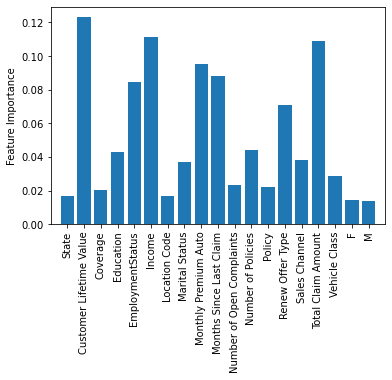

In [59]:
print(rfclf.feature_importances_)
print(predictors)
n = len(predictors)
plt.bar(range(0,n),rfclf.feature_importances_)

plt.xticks(range(0,n), predictors, rotation=90) # put the feature names in x-axis
plt.xlim([-1, n]) # reset the x-limits for readability
plt.ylabel("Feature Importance")
plt.show()

In [60]:
df.head()

State  Customer Lifetime Value  Response  Coverage  Education  \
0   0.00                 0.099340         0       0.5       0.25   
1   0.50                 0.344314         0       0.0       0.25   
2   0.25                 0.506471         0       1.0       0.25   
3   1.00                 0.368424         0       0.5       0.25   
4   0.00                 0.104098         0       0.5       0.25   

   EmploymentStatus    Income  Location Code  Marital Status  \
0              0.25  0.750231            1.0             0.5   
1              0.00  0.000000            1.0             0.0   
2              0.25  0.698400            1.0             0.5   
3              0.00  0.000000            1.0             0.5   
4              0.25  0.662151            0.5             0.0   

   Monthly Premium Auto  ...  Number of Policies  Policy  Renew Offer Type  \
0              0.077690  ...               0.000   0.750          0.666667   
1              0.272611  ...               0.875   0.250          0.333333   
2              0.360138  ...               0.125   0.250          0.666667   
3              0.348354  ...               0.750   0.500          0.666667   
4              0.113216  ...               0.000   0.625          0.666667   

   Sales Channel  Total Claim Amount  Vehicle Class  day_of_month  \
0            1.0            0.132974            0.4            24   
1            1.0            0.391051            0.2            31   
2            1.0            0.195764            0.4            19   
3            0.0            0.183117            0.6            20   
4            1.0            0.047710            0.2             3   

   month_of_year  F  M  
0              2  1  0  
1              1  1  0  
2              2  1  0  
3              1  0  1  
4              2  0  1  

[5 rows x 22 columns]

## Creating three supervised machine learning (ML) models except any ensemble approach for predicting customer response.

#### Startified Split between the Training and Test Set. 

#### This that returns stratified randomized folds,  preserving the percentage of samples for each class.

In [66]:
df.reset_index(drop=True, inplace=True)

In [136]:
X = df[["State", "Customer Lifetime Value", "Coverage", "Education", "EmploymentStatus", 
               "Income", "Location Code", "Marital Status", "Monthly Premium Auto",
               "Months Since Last Claim", "Number of Open Complaints", "Number of Policies", "Policy",
               "Renew Offer Type", "Sales Channel", "Total Claim Amount", "Vehicle Class", "F", "M"]]

y = data[["Response"]]

In [137]:
r_state = 15
test_ds_sz = 0.3
X_train = [] # features
y_train = [] # labels
X_test = [] # features
y_test = [] # labels

sss_rg = StratifiedShuffleSplit(n_splits=1, test_size=test_ds_sz, random_state=r_state)
sss_rg.get_n_splits(X, y)

for tr_idx, test_idx in sss_rg.split(X, y):
    X_train, X_test = X.iloc[tr_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[tr_idx], y.iloc[test_idx]

### kNN Classifier

In [138]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test['Response']))

Text(0, 0.5, 'Error Rate')

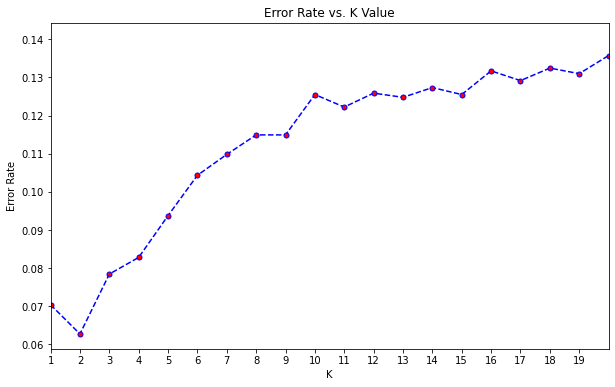

In [139]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.xlim(1, 20)
plt.xticks(range(1, 20))
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
# Training Accuracy:
knn_acc = accuracy_score(y_train, knn.predict(X_train))
print ("KNN Training Accuracy: {}".format(knn_acc))

KNN Training Accuracy: 0.9923353668074456


In [156]:
y_pred_knn = knn.predict(X_test)
#Testing Accuracy:
knn_acc_test = accuracy_score(y_test, y_pred_knn)
print ("KNN Testing Accuracy: {}".format(knn_acc_test))

KNN Testing Accuracy: 0.9372491791317038


In [157]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_knn))

[[2258   90]
 [  82  311]]


In [158]:
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.96      0.96      2348
         Yes       0.78      0.79      0.78       393

    accuracy                           0.94      2741
   macro avg       0.87      0.88      0.87      2741
weighted avg       0.94      0.94      0.94      2741



### SVM Classifier

In [149]:
from sklearn import svm

### SVM with Polynomial Kernel

### SVM with Polynomial Kernel Hyperparameter Optimization using GridSearch

In [187]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid_poly = {'degree': [2, 3, 4],
              'kernel': ['poly']} 
  
grid_svm_poly = GridSearchCV(svm.SVC(), param_grid_poly, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_svm_poly.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ..........................degree=2, kernel=poly; total time=   0.5s
[CV 2/5] END ..........................degree=2, kernel=poly; total time=   0.5s
[CV 3/5] END ..........................degree=2, kernel=poly; total time=   0.5s
[CV 4/5] END ..........................degree=2, kernel=poly; total time=   0.5s
[CV 5/5] END ..........................degree=2, kernel=poly; total time=   0.5s
[CV 1/5] END ..........................degree=3, kernel=poly; total time=   0.6s
[CV 2/5] END ..........................degree=3, kernel=poly; total time=   0.6s
[CV 3/5] END ..........................degree=3, kernel=poly; total time=   0.6s
[CV 4/5] END ..........................degree=3, kernel=poly; total time=   0.6s
[CV 5/5] END ..........................degree=3, kernel=poly; total time=   0.6s
[CV 1/5] END ..........................degree=4, kernel=poly; total time=   0.9s
[CV 2/5] END ..........................degree=4, 

GridSearchCV(estimator=SVC(),
             param_grid={'degree': [2, 3, 4], 'kernel': ['poly']}, verbose=3)

In [188]:
print(grid_svm_poly.best_params_)

{'degree': 4, 'kernel': 'poly'}


In [189]:
svc_poly = svm.SVC(kernel='poly', degree=4)

svc_poly.fit(X_train,y_train)

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc.predict(X_train))))

y_pred_svm_poly = svc_poly.predict(X_test)
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, y_pred_svm_poly)))

Training accuracy: 0.9998435789144376
Testing accuracy : 0.900401313389274


In [190]:
print(confusion_matrix(y_test,y_pred_svm_poly))
print(classification_report(y_test, y_pred_svm_poly, target_names=target_names))

[[2270   78]
 [ 195  198]]
              precision    recall  f1-score   support

          No       0.92      0.97      0.94      2348
         Yes       0.72      0.50      0.59       393

    accuracy                           0.90      2741
   macro avg       0.82      0.74      0.77      2741
weighted avg       0.89      0.90      0.89      2741



### SVM with RBF Kernel Hyperparameter Optimization using GridSearch

In [170]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.7s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.7s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.7s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.8s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.1s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   3.2s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.7s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   1.5s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [172]:
print(grid.best_params_)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}


### SVM with RBF Kernel

In [173]:
svc = svm.SVC(kernel='rbf', C=100, gamma=1)

svc.fit(X_train,y_train)

#Training accuracy:
print("Training accuracy: {}".format(metrics.accuracy_score(y_train, svc.predict(X_train))))

y_pred_svm = svc.predict(X_test)
print("Testing accuracy : {}".format(metrics.accuracy_score(y_test, y_pred_svm)))

Training accuracy: 0.9998435789144376
Testing accuracy : 0.9500182415176943


In [174]:
print(confusion_matrix(y_test,y_pred_svm))

[[2247  101]
 [  36  357]]


In [175]:
print(classification_report(y_test, y_pred_svm, target_names=target_names))

              precision    recall  f1-score   support

          No       0.98      0.96      0.97      2348
         Yes       0.78      0.91      0.84       393

    accuracy                           0.95      2741
   macro avg       0.88      0.93      0.90      2741
weighted avg       0.95      0.95      0.95      2741



### Descision Tree Classifier

In [208]:
from sklearn.tree import DecisionTreeClassifier

### Hyperparameter tuning for DecisionTreeClassifier

In [274]:
param_grid_dtree = {
    'max_depth' : [5,7,10]
}

dtree = DecisionTreeClassifier(random_state=42)

grid_dtree = GridSearchCV(estimator=dtree, param_grid=param_grid_dtree, scoring='neg_mean_squared_error', cv=5)

grid_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, 10]},
             scoring='neg_mean_squared_error')

In [275]:
print(grid_dtree.best_params_)

{'max_depth': 10}


In [277]:
dtree_ = DecisionTreeClassifier(max_depth=10, random_state=42)

dtree_.fit(X_train, y_train)
print("Training accuracy: {}".format(accuracy_score(y_train, dtree_.predict(X_train))))

y_pred_dtree = dtree_.predict(X_test)
print("Testing accuracy : {}".format(accuracy_score(y_test, y_pred_dtree)))


Training accuracy: 0.9310183012670108
Testing accuracy : 0.9014958044509304


In [278]:
print(confusion_matrix(y_test,y_pred_dtree))
print(classification_report(y_test, y_pred_dtree, target_names=target_names))

[[2273   75]
 [ 195  198]]
              precision    recall  f1-score   support

          No       0.92      0.97      0.94      2348
         Yes       0.73      0.50      0.59       393

    accuracy                           0.90      2741
   macro avg       0.82      0.74      0.77      2741
weighted avg       0.89      0.90      0.89      2741



[Text(507.48811141304344, 518.8909090909091, 'X[4] <= 0.875\ngini = 0.245\nsamples = 6393\nvalue = [5478, 915]'),
 Text(215.5047554347826, 469.4727272727273, 'X[13] <= 0.5\ngini = 0.22\nsamples = 6208\nvalue = [5427, 781]'),
 Text(15.921195652173912, 420.05454545454546, 'X[5] <= 0.776\ngini = 0.02\nsamples = 1688\nvalue = [1671, 17]'),
 Text(11.372282608695652, 370.6363636363636, 'gini = 0.0\nsamples = 1154\nvalue = [1154, 0]'),
 Text(20.470108695652172, 370.6363636363636, 'X[5] <= 0.776\ngini = 0.062\nsamples = 534\nvalue = [517, 17]'),
 Text(15.921195652173912, 321.21818181818185, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(25.019021739130434, 321.21818181818185, 'X[9] <= 0.014\ngini = 0.051\nsamples = 531\nvalue = [517, 14]'),
 Text(9.097826086956522, 271.8, 'X[15] <= 0.188\ngini = 0.351\nsamples = 22\nvalue = [17, 5]'),
 Text(4.548913043478261, 222.38181818181818, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]'),
 Text(13.646739130434781, 222.38181818181818, 'X[15] <= 0.2\ngini =

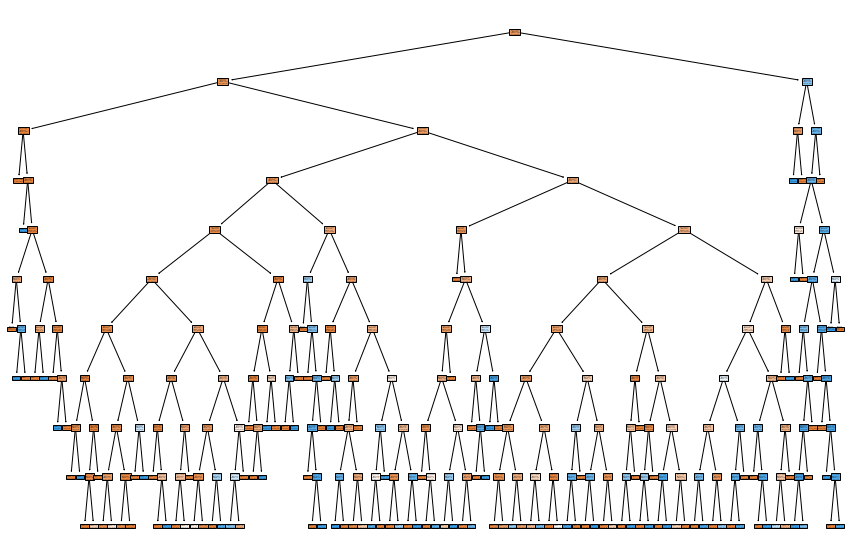

In [279]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree_,filled=True)

### Post Pruning Decision Tree

Number of nodes in the last tree is: 1 with ccp_alpha: 0.020132596014825643


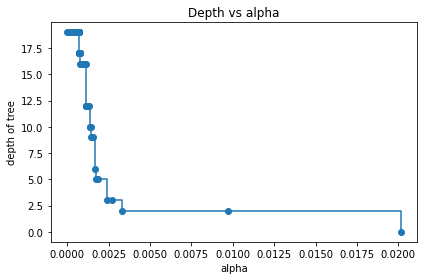

In [235]:
dtree_pr = DecisionTreeClassifier(random_state=42)

path = dtree_pr.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Several model for diffrent aplpha values.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

depth = [clf.tree_.max_depth for clf in clfs]

plt.plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("depth of tree")
plt.title("Depth vs alpha")
plt.tight_layout()

### Alpha vs training and testing accuracy

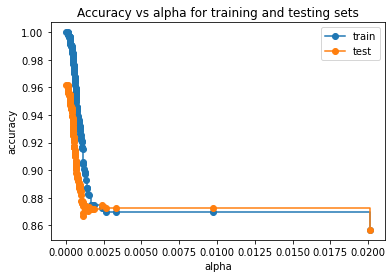

In [236]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")

ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")

ax.legend()
plt.show()

In [253]:
dtree_ = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)

dtree_.fit(X_train, y_train)
print("Training accuracy: {}".format(accuracy_score(y_train, dtree_.predict(X_train))))

y_pred_dtree = dtree_.predict(X_test)
print("Testing accuracy : {}".format(accuracy_score(y_test, y_pred_dtree)))


Training accuracy: 0.8698576568121382
Testing accuracy : 0.8723093761400948


In [254]:
print(confusion_matrix(y_test,y_pred_dtree))
print(classification_report(y_test, y_pred_dtree, target_names=target_names))

[[2321   27]
 [ 323   70]]
              precision    recall  f1-score   support

          No       0.88      0.99      0.93      2348
         Yes       0.72      0.18      0.29       393

    accuracy                           0.87      2741
   macro avg       0.80      0.58      0.61      2741
weighted avg       0.86      0.87      0.84      2741



[Text(418.5, 407.70000000000005, 'X[4] <= 0.875\ngini = 0.245\nsamples = 6393\nvalue = [5478, 915]'),
 Text(209.25, 135.89999999999998, 'gini = 0.22\nsamples = 6208\nvalue = [5427, 781]'),
 Text(627.75, 135.89999999999998, 'gini = 0.399\nsamples = 185\nvalue = [51, 134]')]

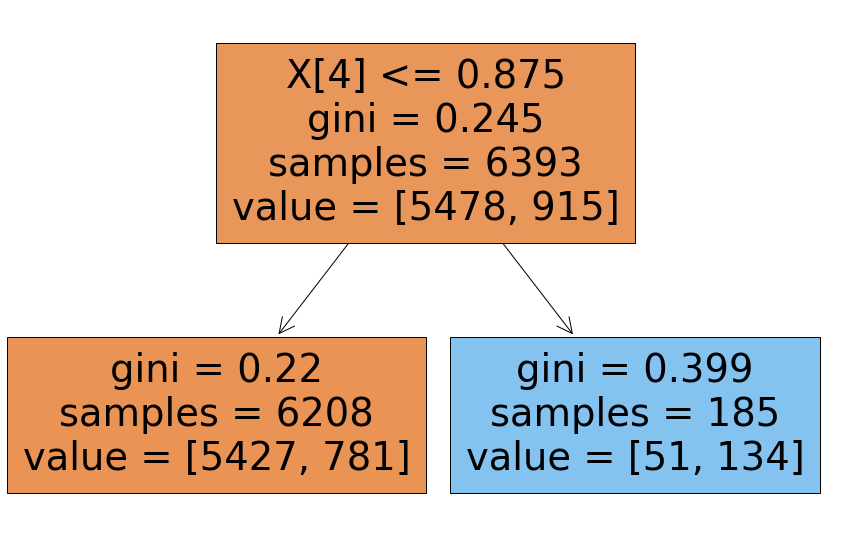

In [255]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree_,filled=True)